In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
flight_train=pd.read_excel("Data_Train.xlsx")
flight_test=pd.read_excel("Test_set.xlsx")

In [3]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
flight_train.shape

(10683, 11)

In [5]:
flight_test.shape

(2671, 10)

# EDA

In [6]:
#data types of each column
flight_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
#checking null values
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
flight_train.iloc[np.where(flight_train.Route.isnull())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### About the data
- All the columns have object data type except dependent variables , so it needs to be transformed
- Train data has only 1 null value so we will drop that

In [9]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
#Date of journey column pre processing, converting into date time and extraxting day and month

flight_train['Day_Journey']=pd.to_datetime(flight_train['Date_of_Journey']).dt.day
flight_train['Month_Journey']=pd.to_datetime(flight_train['Date_of_Journey']).dt.month

#dropping the original column
flight_train.drop('Date_of_Journey',axis=1,inplace=True)

In [11]:
#dep time column pre processing
flight_train['Dep_hour']=pd.to_datetime(flight_train['Dep_Time']).dt.hour
flight_train['Dep_min']=pd.to_datetime(flight_train['Dep_Time']).dt.minute
flight_train.drop('Dep_Time',axis=1,inplace=True)

In [12]:
#arrival time column pre processing
flight_train['Arrival_hr']=pd.to_datetime(flight_train['Arrival_Time']).dt.hour
flight_train['Arival_min']=pd.to_datetime(flight_train['Arrival_Time']).dt.minute
flight_train.drop('Arrival_Time',axis=1,inplace=True)

In [13]:
# duration column
flight_train['Duration_hr']=flight_train['Duration'].str.split('h').str[0]
flight_train['Duration_min']=flight_train['Duration'].str.rstrip('m').str.split(' ').str[1]
flight_train.drop('Duration',axis=1,inplace=True)

In [14]:
flight_train.iloc[np.where(flight_train['Duration_hr']=='5m')]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_Journey,Month_Journey,Dep_hour,Dep_min,Arrival_hr,Arival_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,3,6,16,50,16,55,5m,NaN


The above record seems to be an outlier as the duration between Mumbai to Hyderabad does not seem correct , so will drop this row

In [15]:
#counting the stops
flight_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [16]:
#replacing no-stops with 0 stops
flight_train['Total_Stops']=flight_train['Total_Stops'].replace('non-stop','0 stop')

In [17]:
flight_train['Stops']=flight_train['Total_Stops'].str.split(" ").str[0]
#dropping the original column
flight_train.drop('Total_Stops',axis=1,inplace=True)

In [18]:
# Missing values
flight_train.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Additional_Info       0
Price                 0
Day_Journey           0
Month_Journey         0
Dep_hour              0
Dep_min               0
Arrival_hr            0
Arival_min            0
Duration_hr           0
Duration_min       1032
Stops                 1
dtype: int64

In [19]:
#filling the Duration min by 0 
flight_train['Duration_min'].fillna(0,inplace=True)

In [20]:
#dropping two rows mentioned above
flight_train.drop([9039,6474],axis=0,inplace=True)

In [21]:
#dropping Additional_Info column because most of the info is missing
#dropping Route column as stops and route are related

flight_train.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [22]:
#changing the data types of few columns
flight_train['Duration_hr']=flight_train['Duration_hr'].astype(int)
flight_train['Duration_min']=flight_train['Duration_min'].astype(int)
flight_train['Stops']=flight_train['Stops'].astype(int)

In [25]:
flight_train

,Airline,Source,Destination,Price,Day_Journey,Month_Journey,Dep_hour,Dep_min,Arrival_hr,Arival_min,Duration_hr,Duration_min,Stops
0,IndiGo,Banglore,New Delhi,3897,24,3,22,20,1,10,2,50,0
1,Air India,Kolkata,Banglore,7662,5,1,5,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,13882,6,9,9,25,4,25,19,0,2
3,IndiGo,Kolkata,Banglore,6218,5,12,18,5,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,13302,3,1,16,50,21,35,4,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,4107,4,9,19,55,22,25,2,30,0
10679,Air India,Kolkata,Banglore,4145,27,4,20,45,23,20,2,35,0
10680,Jet Airways,Banglore,Delhi,7229,27,4,8,20,11,20,3,0,0
10681,Vistara,Banglore,New Delhi,12648,3,1,11,30,14,10,2,40,0


## Visualization

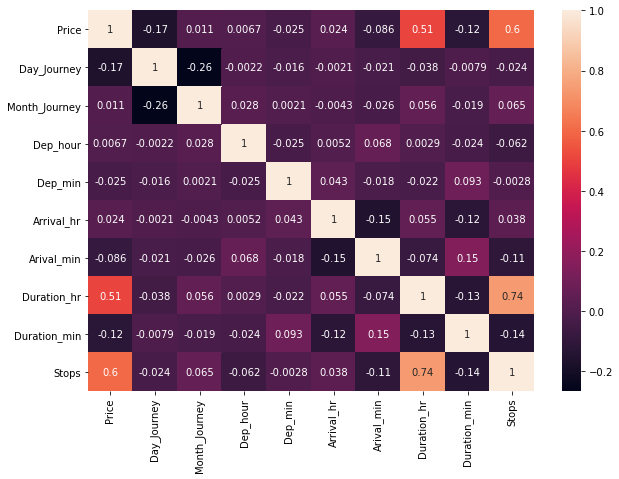

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(flight_train.corr(),annot=True)

Dependent variable i.e Price has a moderately positive relation with Stops and Duration hr

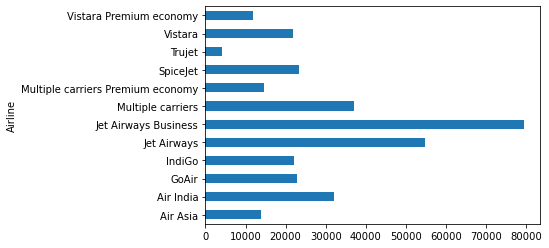

In [24]:
flight_train['Price'].groupby(flight_train['Airline']).max().plot.barh()

Jet Airways business has the highest price and then the Jet Airways . Trujet has lowest price among all.

## Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

flight_train['Airline']= lb.fit_transform(flight_train['Airline']) 
flight_train['Source']= lb.fit_transform(flight_train['Source']) 
flight_train['Destination']= lb.fit_transform(flight_train['Destination']) 

In [34]:
flight_train

,Airline,Source,Destination,Price,Day_Journey,Month_Journey,Dep_hour,Dep_min,Arrival_hr,Arival_min,Duration_hr,Duration_min,Stops
0,3,0,5,3897,24,3,22,20,1,10,2,50,0
1,1,3,0,7662,5,1,5,50,13,15,7,25,2
2,4,2,1,13882,6,9,9,25,4,25,19,0,2
3,3,3,0,6218,5,12,18,5,23,30,5,25,1
4,3,0,5,13302,3,1,16,50,21,35,4,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4107,4,9,19,55,22,25,2,30,0
10679,1,3,0,4145,27,4,20,45,23,20,2,35,0
10680,4,0,2,7229,27,4,8,20,11,20,3,0,0
10681,10,0,5,12648,3,1,11,30,14,10,2,40,0


#### Dropping duplicates

In [35]:
flight_train.duplicated().value_counts()

False    10459
True       222
dtype: int64

In [36]:
#dropping the duplicate values
flight_train=flight_train.drop_duplicates()

In [37]:
#final shape of data
flight_train.shape

(10459, 13)

## Model Building

In [38]:
#splitting the data into independent and dependent variables
X=flight_train.iloc[:,flight_train.columns!='Price']
y=flight_train['Price']

In [61]:
#dividing into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [63]:
y_pred = dt.predict(X_test)

In [64]:
from sklearn import metrics
print('R2:',metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: 0.6439923033124659
MAE: 1368.8748672190357
MSE: 7221132.087002514
RMSE: 2687.2164198297305


### Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
y_pred = rf.predict(X_test)

In [67]:
from sklearn import metrics
print('R2:',metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: 0.7883772274777888
MAE: 1211.9377936234328
MSE: 4292480.21101585
RMSE: 2071.830159790095


### XG Boost

In [68]:
import xgboost as xgb

In [69]:
xgb_regressor=xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
y_pred = xgb_regressor.predict(X_test)

In [71]:
from sklearn import metrics
print('R2:',metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: 0.8033410475349807
MAE: 1196.7591292488871
MSE: 3988959.466479927
RMSE: 1997.2379594029167


In [72]:
xgb_regressor.score(X_train,y_train)

0.9417808411094835

In [73]:
xgb_regressor.score(X_test,y_test)

0.8033410475349807

The R2 score is highest and RMSE score is lowest in XGBoost . Let's use this model with hyperparameter tuning

### Training XGboost with hyper parameter tuning

### Using Grid Search for tuning

In [74]:
params={"learning_rate":[0.001,0.01,0.1],
        "n_estimators":[100,300,500],
        "colsample_bytree":[0.5,0.7,0.8],
        "max_depth":[3,5,7,10],
        'min_child_weight': [0.5, 1, 5]
       }

In [75]:
from sklearn.model_selection import GridSearchCV

grid_xgb=GridSearchCV(xgb_regressor,params,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
grid_xgb.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [76]:
grid_xgb.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 0.5,
 'n_estimators': 100}

In [78]:
xgb_reg=xgb.XGBRegressor(colsample_bytree=0.5,learning_rate=0.1,max_depth=7,min_child_weight=0.5,n_estimators=100)
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=0.5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
pred_xgb=xgb_reg.predict(X_test)

In [80]:
from sklearn import metrics
print('R2:',metrics.r2_score(y_test, pred_xgb))
print('MAE:', metrics.mean_absolute_error(y_test, pred_xgb))
print('MSE:', metrics.mean_squared_error(y_test, pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)))

R2: 0.825232069726638
MAE: 1211.591328121888
MSE: 3544929.8451085533
RMSE: 1882.79840798439


In [81]:
#checking for overfitting
print(xgb_reg.score(X_train,y_train))
print(xgb_reg.score(X_test,y_test))

0.9159727423899408
0.825232069726638


### Using Randomized Search for tuning

In [82]:
from sklearn.model_selection import RandomizedSearchCV

rand_xgb=RandomizedSearchCV(xgb_regressor,params,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
rand_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_par...l_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_w

In [83]:
rand_xgb.best_params_

{'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7}

In [85]:
xgb_reg=xgb.XGBRegressor(colsample_bytree=0.7,learning_rate=0.01,max_depth=10,min_child_weight=1,n_estimators=500)
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
pred_xgb=xgb_reg.predict(X_test)

In [87]:
from sklearn import metrics
print('R2:',metrics.r2_score(y_test, pred_xgb))
print('MAE:', metrics.mean_absolute_error(y_test, pred_xgb))
print('MSE:', metrics.mean_squared_error(y_test, pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)))

R2: 0.8347681564441604
MAE: 1135.8055660328034
MSE: 3351503.291634967
RMSE: 1830.7111436911523


In [88]:
#checking for overfitting
print(xgb_reg.score(X_train,y_train))
print(xgb_reg.score(X_test,y_test))

0.934483514585502
0.8347681564441604


# Applying model on given test data

In [89]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [91]:
flight_test.shape

(2671, 10)

In [92]:
#Date of journey column pre processing, converting into date time and extraxting day and month
flight_test['Day_Journey']=pd.to_datetime(flight_test['Date_of_Journey']).dt.day
flight_test['Month_Journey']=pd.to_datetime(flight_test['Date_of_Journey']).dt.month
#dropping the original column
flight_test.drop('Date_of_Journey',axis=1,inplace=True)

#dep time column pre processing
flight_test['Dep_hour']=pd.to_datetime(flight_test['Dep_Time']).dt.hour
flight_test['Dep_min']=pd.to_datetime(flight_test['Dep_Time']).dt.minute
flight_test.drop('Dep_Time',axis=1,inplace=True)

#arrival time column pre processing
flight_test['Arrival_hr']=pd.to_datetime(flight_test['Arrival_Time']).dt.hour
flight_test['Arival_min']=pd.to_datetime(flight_test['Arrival_Time']).dt.minute
flight_test.drop('Arrival_Time',axis=1,inplace=True)

# duration column
flight_test['Duration_hr']=flight_test['Duration'].str.split('h').str[0]
flight_test['Duration_min']=flight_test['Duration'].str.rstrip('m').str.split(' ').str[1]
flight_test.drop('Duration',axis=1,inplace=True)

#replacing no-stops with 0 stops
flight_test['Total_Stops']=flight_test['Total_Stops'].replace('non-stop','0 stop')
flight_test['Stops']=flight_test['Total_Stops'].str.split(" ").str[0]
flight_test.drop('Total_Stops',axis=1,inplace=True)



In [93]:
flight_test.iloc[np.where(flight_test['Duration_hr']=='5m')]

,Airline,Source,Destination,Route,Additional_Info,Day_Journey,Month_Journey,Dep_hour,Dep_min,Arrival_hr,Arival_min,Duration_hr,Duration_min,Stops
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,No info,3,12,16,50,16,55,5m,NaN,2


In [94]:
#dropping two rows mentioned above
flight_test.drop([2660],axis=0,inplace=True)

In [95]:
#filling the Duration min by 0 
flight_test['Duration_min'].fillna(0,inplace=True)

#changing the data types of few columns
flight_test['Duration_hr']=flight_test['Duration_hr'].astype(int)
flight_test['Duration_min']=flight_test['Duration_min'].astype(int)
flight_test['Stops']=flight_test['Stops'].astype(int)

In [96]:
#dropping Additional_Info column because most of the info is missing
#dropping Route column as stops and route are related
flight_test.drop(['Additional_Info','Route'],axis=1,inplace=True)

# converting categorical to numerical using label encoding
lb1=LabelEncoder()

flight_test['Airline']= lb1.fit_transform(flight_test['Airline']) 
flight_test['Source']= lb1.fit_transform(flight_test['Source']) 
flight_test['Destination']= lb1.fit_transform(flight_test['Destination'])



In [97]:
flight_test.duplicated().value_counts()
#dropping the duplicate values
flight_test=flight_test.drop_duplicates()

In [98]:
flight_test.head()

,Airline,Source,Destination,Day_Journey,Month_Journey,Dep_hour,Dep_min,Arrival_hr,Arival_min,Duration_hr,Duration_min,Stops
0,4,2,1,6,6,17,30,4,25,10,55,1
1,3,3,0,5,12,6,20,10,20,4,0,1
2,4,2,1,21,5,19,15,19,0,23,45,1
3,6,2,1,21,5,8,0,21,0,13,0,1
4,0,0,2,24,6,23,55,2,45,2,50,0


In [101]:
flight_test.shape

(2566, 12)

In [107]:
test_pred = xgb_reg.predict(flight_test)

In [109]:
pd.DataFrame({'Prediction':test_pred})

,Prediction
0,11592.645508
1,4420.623047
2,13840.460938
3,10421.774414
4,3800.980957
...,...
2561,10274.875977
2562,4761.429199
2563,15464.916016
2564,13443.074219
